<a href="https://colab.research.google.com/github/CoolerKula/Introduction-to-Regression---Independent-Project/blob/main/Introduction_to_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement
Mobile carrier Megaline has found out that many of their subscribers use legacy plans.
They want to develop a model that would analyze subscribers' behavior and recommend
one of Megaline's newer plans: Smart or Ultra.
You have access to behavior data about subscribers who have already switched to the
new plans (from the project for the Statistical Data Analysis course). For this
classification task, you need to develop a model that will pick the right plan. Since you’ve
already performed the data preprocessing step, you can move straight to creating the
model.
Develop a model with the highest possible accuracy. In this project, the threshold for
accuracy is 0.75. Check the accuracy using the test dataset.
1. Open and look through the data file.
2. Split the source data into a training set, a validation set, and a test set.
3. Investigate the quality of different models by changing hyperparameters. Briefly
describe the findings of the study.
4. Check the quality of the model using the test set.
5. Additional task: sanity check the model. This data is more complex than what
you’re used to working with, so it's not an easy task. We'll take a closer look at it
later.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

### **DATA IMPORTATION**

In [ ]:
#Data importation
data = pd.read_csv("https://bit.ly/UsersBehaviourTelco")
data

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


### **DATA EXPLORATION**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [ ]:
data.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


### **DATA CLEANING AND PREPARATION**

In [ ]:
data.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [ ]:
data['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

### **DATA MODELING**

In [ ]:
target = data['is_ultra']

features = data.drop(['is_ultra'], axis=1)

# set aside 20% of train and test data for evaluation
features_train, features_test, target_train, target_test = train_test_split(features, target,
    test_size=0.2, shuffle = True, random_state = 12345)

features_train, features_valid, target_train, target_valid = train_test_split(

    features, target, test_size=0.25, random_state=12345
)

print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)

(2410, 4)
(2410,)
(804, 4)
(804,)
(643, 4)
(643,)


In [ ]:
datalist = data.columns.values.tolist()
datalist
#datalist.remove("is_ultra")

['calls', 'minutes', 'messages', 'mb_used', 'is_ultra']

In [ ]:
model = RandomForestClassifier(random_state=12345, n_estimators=10)
        
model.fit(features_train,target_train)

print('Validation set:',model.score(features_valid, target_valid))
print('Training set:',model.score(features_train,target_train))
print('Test set:',model.score(features_test,target_test))

Validation set: 0.7898009950248757
Training set: 0.9755186721991701
Test set: 0.7853810264385692


In [ ]:
model = DecisionTreeClassifier(random_state=12345)
        
model.fit(features_train,target_train)

print('Validation set:',model.score(features_valid, target_valid))
print('Training set:',model.score(features_train,target_train))
print('Test set:',model.score(features_test,target_test))

Validation set: 0.7213930348258707
Training set: 1.0
Test set: 0.7216174183514774


In [ ]:
model = LogisticRegression(random_state=12345, solver='liblinear')
        
model.fit(features_train,target_train)

print('Validation set:',model.score(features_valid, target_valid))
print('Training set:',model.score(features_train,target_train))
print('Test set:',model.score(features_test,target_test))

Validation set: 0.7039800995024875
Training set: 0.7045643153526971
Test set: 0.7013996889580093


In [ ]:
predictions_valid = model.predict(features_valid)
accuracy_score(target_valid, predictions_valid)

0.7039800995024875

### **MODEL** **EVALUATION**

In [ ]:
print("Confusion Matrix : \n",confusion_matrix(target_valid, predictions_valid))

Confusion Matrix : 
 [[557   6]
 [232   9]]


In [ ]:
print(' f1 score: ',f1_score(target_valid, predictions_valid)*100,'\n')
print(' Accuracy: ',accuracy_score(target_valid, predictions_valid)*100,'\n')
print(' precision score: ',precision_score(target_valid, predictions_valid)*100,'\n')
print(' recall score: ',recall_score(target_valid, predictions_valid)*100,'\n')
print(" Classification report: \n",classification_report(target_valid, predictions_valid))

 f1 score:  7.03125 

 Accuracy:  70.39800995024875 

 precision score:  60.0 

 recall score:  3.7344398340248963 

 Classification report: 
               precision    recall  f1-score   support

           0       0.71      0.99      0.82       563
           1       0.60      0.04      0.07       241

    accuracy                           0.70       804
   macro avg       0.65      0.51      0.45       804
weighted avg       0.67      0.70      0.60       804



### **HYPARAMETER TUNING**

In [ ]:
#Hyparameter Tuning
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
for depth in range(1, 6):
        model = DecisionTreeClassifier(max_depth=depth)

        model.fit(features_valid, target_valid)

        predictions_valid = model.predict(features_valid)
        accuracy_score(target_valid, predictions_valid)

        print("max_depth =", depth, ": ", end='')
        print(accuracy_score(target_valid, predictions_valid))

max_depth = 1 : 0.7686567164179104
max_depth = 2 : 0.8009950248756219
max_depth = 3 : 0.8059701492537313
max_depth = 4 : 0.8208955223880597
max_depth = 5 : 0.835820895522388


### **FINDINGS AND RECOMMENDATIONS**

RandomForest is the best model for the predictions

### **Sanity Check**

0    0.690299
1    0.309701
dtype: float64
0    0.690299
1    0.309701
dtype: float64


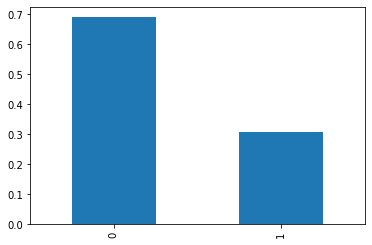

In [ ]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)

# to make value_counts() work,
# we converted results to pd.Series
predicted_valid = pd.Series(model.predict(features_valid))

class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

print(class_frequency)

In [ ]:
target_pred_constant = pd.Series(model.predict(features))
print(accuracy_score(target, target_pred_constant))

0.9303049159925326
